<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

- Object Oriented (OO) interface.
- gives us a more nuanced control over what is going on by allowing us to manipulate the various axes easily.

# 1 Some nomenclature

### Distinguish between a Matplotlib figure and an axis

- A figure is simple; it is the full canvas you use to draw stuff on.
- An axis is the individual mathematical axes we use for plotting.
- one figure can have multiple axes               

# 2 Comparing the two ‘dialects’ (between pyplot and OO)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

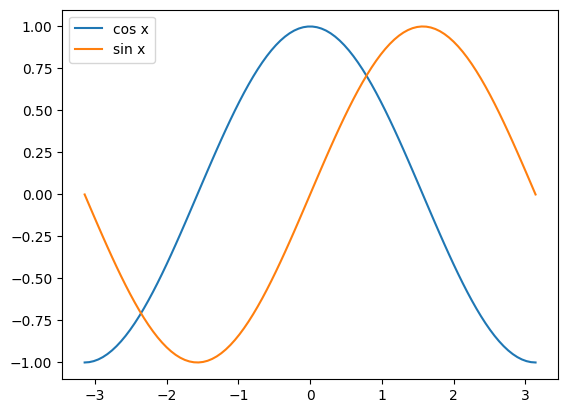

In [11]:
# pyplot interface
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()


### OO Interface

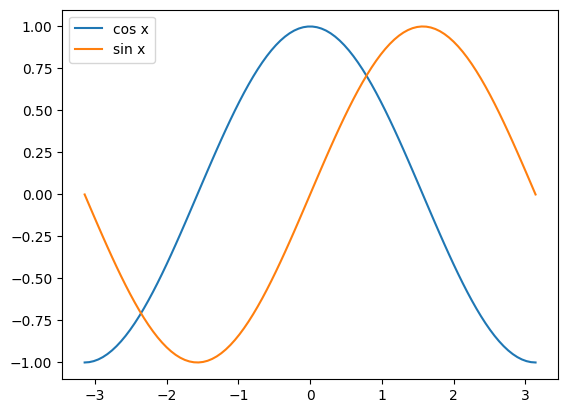

In [12]:
# OO interface
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

For the OO interface, we have to start by using subplots() to ask Matplotlib to create a figure and an axis. 

Matplotlib obliges and gives us a figure (fig) and an axis (ax).

Although I have used the variables fig and ax you are free to call them what you like. But this is what is commonly used in the documentation. 

In this example, I need only one column and one row. But, if I want, I can ask for a grid like in the plot right at the top. 

# 3 What is OO ax, really?

The code below creates the (crude) plot.

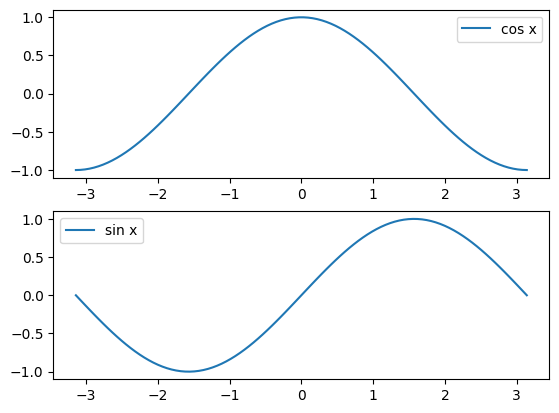

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

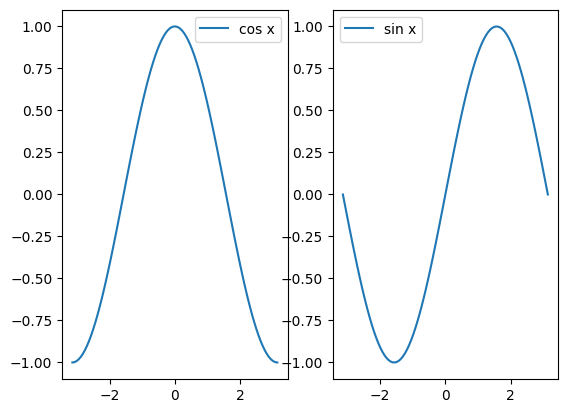

In [17]:
# to get two column in one row
fig, ax = plt.subplots(ncols=2, nrows=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [18]:
# What is ax?
# ax is a numpy array
type(ax)

numpy.ndarray

In [19]:
# size of ax
ax.shape

(2,)

In [20]:
# what is contained in ax?
# a Matplotlib axis
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

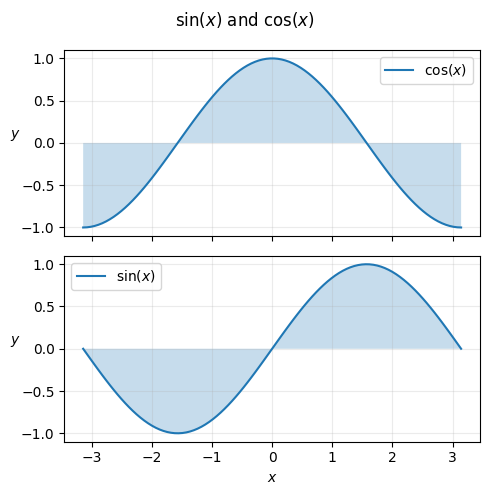

In [25]:
# set up the figure and axes
# get two axes ready to plot in two rows in one column
# figsize() to change the size of the figure
# sharex= True asks the plots to share the same x-axis
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)

#Since ax is a NumPy array with two axes, we can index them with [0]and[1]
# fill_between() to color fill the plot 
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

# Draw the legend using for loop that iterate through the items in ax
for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

# since we are sharing x-axis, we just need to label the lowest plot
# lowest plot has the index [1]
ax[1].set_xlabel('$x$')

# adding supertitle to the FIGURE
# not plot
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# to the layout to make our plot look nice
fig.tight_layout()

Unfortunately, the pyplot and OO interfaces don’t use identical function names. 

For example, pyplot used xlabel() to set the x label, but OO uses set_xlabel().

# 5 Multiple rows and columns

work with multiple rows and columns that form a grid of plots 

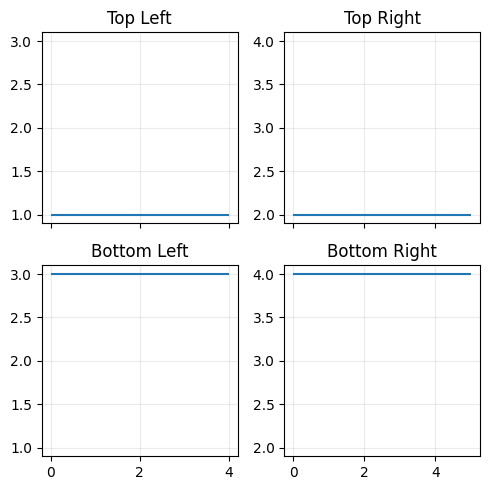

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

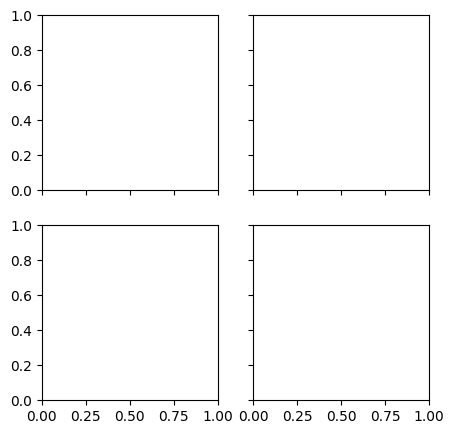

In [27]:
# creating a figure with 2 rows 2 column
# sharing y-axis and x-axis
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [29]:
# to check the structure of ax NumPy array created
# 2x2 array
ax.shape

(2, 2)

Text(0.5, 1.0, 'Bottom Right')

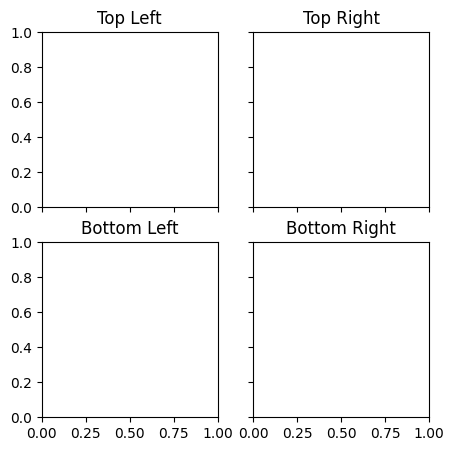

In [32]:
# to access to these axes
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

In [34]:
# if you want to tweak each axes separately
# assign them with familar variables
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [35]:
# Alternatively, you can also use ax.flatten()
# flatten() takes the 2D array and ‘flattens’ it into a 1D array
top_left, top_right, bottom_left, bottom_right = ax.flatten()

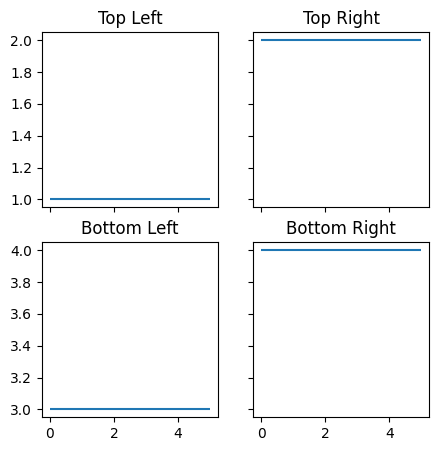

In [37]:
# drawing a horizontal lines with hlines()
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

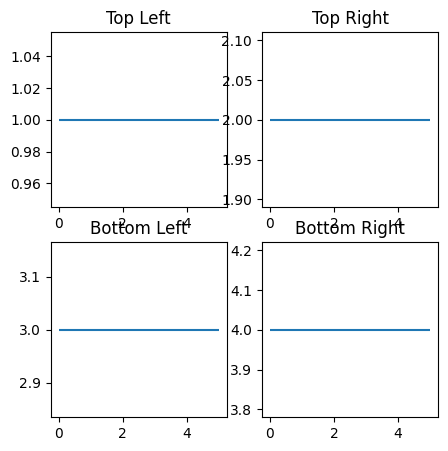

In [40]:
# what will happen if you do not share y and x-axes
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

Matplotlib has auto-scaled both axes.

Specifying how to share axes in three ways:

|Option|Result|
|:---:|:---:|
|True|Makes all the axes use the same range|
|col|Use the same range for all the columns|
|row|Use the same range for all the rows|


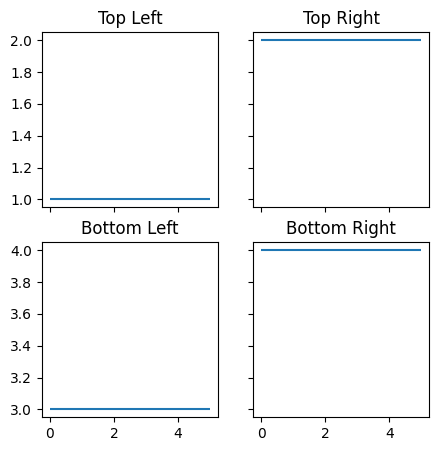

In [43]:
# All the plots share the same range of x-axis
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

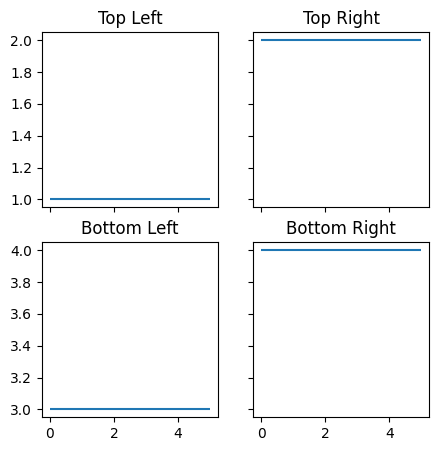

In [44]:
# the columes will share the same x-axis
# the row will share the same y-axis
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.2 Accessing all axes

You will often want to apply changes to all the axes, like in the case of the grid. 

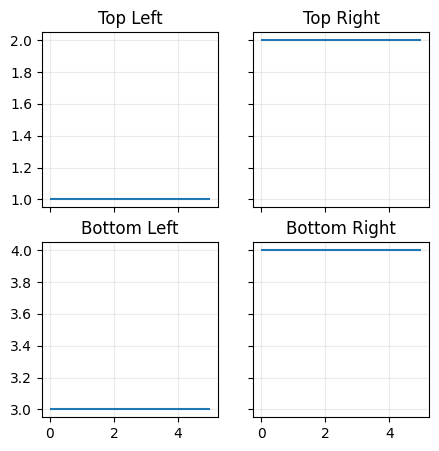

In [46]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

#changing all grid to have the transparency of .25
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

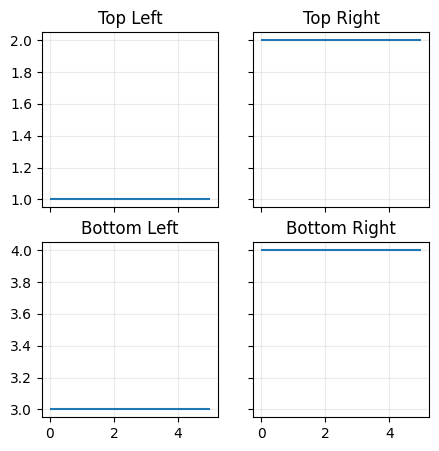

In [47]:
# a more efficient way using for loop
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

# using for loop
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

A histogram is a valuable tool for showing distributions of data. 

### Data


Link to the data:

[All_Mean basic monthly earnings by graduates](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)

[NUS_Mean basic monthly earnings by graduates](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)


### A quick helper function

I will need to read the data from these files several times. So, I will create a function called det_plot_data()

In [48]:
# Skip the first row since it is title
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

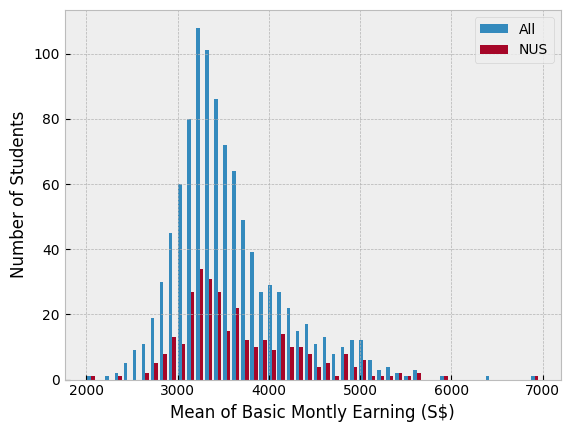

In [50]:
plt.style.use('bmh')
data = get_plot_data()

# plot histogram with plt.hist()
# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()


## 6.2 Scatter plots

Scatter plots are created by putting a marker at an (x,y) point you specify.

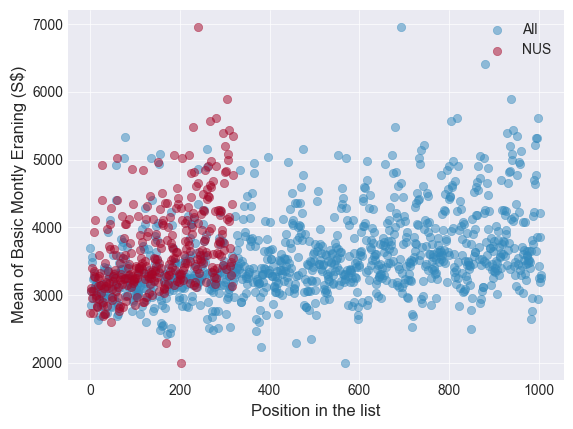

In [51]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

# use range() along with len() 
# to generate a list [0,1,2...] appropriate to the dataset.
for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

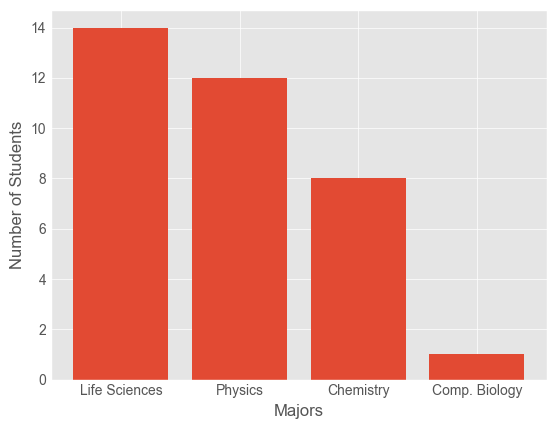

In [52]:
# extract the data and typecast to pass two lists to bar(). 
# Use barh() if you want horizontal bars.
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

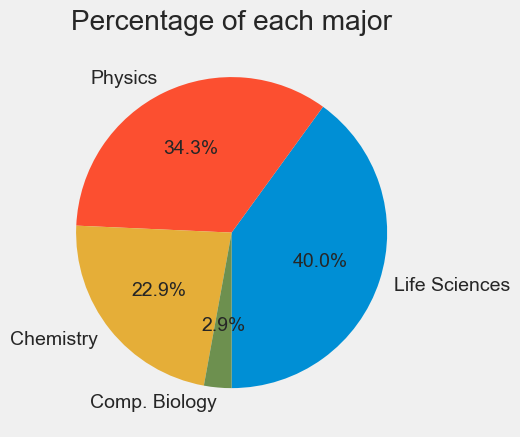

In [53]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')